In [86]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
df = pd.read_csv("titanic.csv")
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [89]:
df.shape

(891, 12)

In [90]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
#df = df.drop('Cabin',axis=1)
df = df.dropna( subset=['Embarked','Age'])

In [92]:
for val in df:
    print(df[val].value_counts())
    print()

1      1
622    1
595    1
596    1
598    1
      ..
298    1
300    1
303    1
306    1
891    1
Name: PassengerId, Length: 712, dtype: int64

0    424
1    288
Name: Survived, dtype: int64

3    355
1    184
2    173
Name: Pclass, dtype: int64

Vander Planke, Miss. Augusta Maria               1
Shelley, Mrs. William (Imanita Parrish Hall)     1
Johansson, Mr. Karl Johan                        1
Carlsson, Mr. August Sigfrid                     1
Bowerman, Miss. Elsie Edith                      1
                                                ..
Coleff, Mr. Peju                                 1
Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)    1
Long, Mr. Milton Clyde                           1
Fortune, Mr. Mark                                1
Jerwan, Mrs. Amin S (Marie Marthe Thuillard)     1
Name: Name, Length: 712, dtype: int64

male      453
female    259
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.9

In [93]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [94]:
print(df['Sex'].unique())
print(df['Embarked'].unique())
print(df['Name'].unique())
print(df['Ticket'].unique())
print(df['Cabin'].unique())
print()

['male' 'female']
['S' 'C' 'Q']
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Fortune, Mr. Charles Alexander' 'Uruchurtu, Don. Manuel E'
 'Wheadon, Mr. Edward H' 'Meyer, Mr. Edgar Joseph'
 'Holverson, Mr. Alexander Oskar' 

In [95]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df.iloc[:,4] = labelencoder.fit_transform(df.iloc[:,4].values)
df.iloc[:,11] = labelencoder.fit_transform(df.iloc[:,11].values)
df.iloc[:,3] = labelencoder.fit_transform(df.iloc[:,3].values)
df.iloc[:,8] = labelencoder.fit_transform(df.iloc[:,8].values)
df.iloc[:,10] = labelencoder.fit_transform(df.iloc[:,10].values)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    int32  
 4   Sex          712 non-null    int32  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    int32  
 9   Fare         712 non-null    float64
 10  Cabin        712 non-null    int32  
 11  Embarked     712 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 58.4 KB


In [96]:
print(df['Sex'].unique())
print(df['Embarked'].unique())


[1 0]
[2 0 1]


In [97]:
df.shape

(712, 12)

In [98]:
df['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

<ipython-input-99-3069a83c54e8>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(list(df['Survived'].value_counts().keys()),list(df['Survived'].value_counts()),color='r''b')


<BarContainer object of 2 artists>

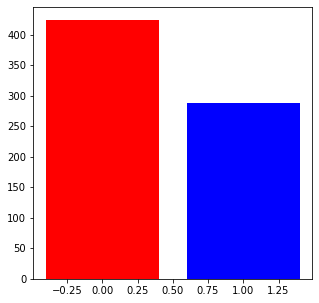

In [99]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Survived'].value_counts().keys()),list(df['Survived'].value_counts()),color='r''b')

In [100]:
df['Sex'].value_counts()

1    453
0    259
Name: Sex, dtype: int64

<BarContainer object of 2 artists>

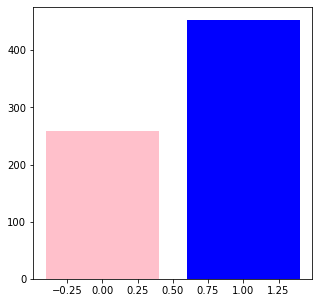

In [101]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Sex'].value_counts().keys()),list(df['Sex'].value_counts()),color=["blue","pink"])

In [102]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

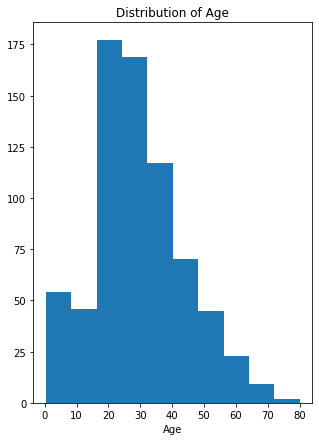

In [103]:
plt.figure(figsize=(5,7))
plt.hist(df['Age'])
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.show()

In [104]:
# split the data x and y varibles 

X = df.iloc[:, 1:12].values
Y = df.iloc[:, 0].values

In [105]:
# split the data set  80 % traning 20 persent testing 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [ ]:
train_test_split


In [106]:
# scakling the test dtat set

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [107]:
# creat a function with ML model 

def models(X_train, Y_train):

# use logestic regration 

    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
# use kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
# use SVC 
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
#use GassianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

#use dessision tree 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
#use random forest 
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    print('LogisticRegression', log.score(X_train, Y_train))
    print('KNeighborsClassifier',knn.score(X_train, Y_train))
    print('SVC',svc_rbf.score(X_train, Y_train))
    print('GaussianNB',gauss.score(X_train, Y_train))
    print('DecisionTreeClassifier',tree.score(X_train, Y_train))
    print('RandomForestClassifier',forest.score(X_train, Y_train))
         
    return log, knn, svc_rbf, gauss, tree, forest

In [108]:
model = models(X_train, Y_train)

LogisticRegression 0.6590509666080844
KNeighborsClassifier 0.20035149384885764
SVC 1.0
GaussianNB 1.0
DecisionTreeClassifier 1.0
RandomForestClassifier 0.9876977152899824
